<a href="https://colab.research.google.com/github/Gops03/Ejercicios/blob/main/PARCIAL2/PARCIAL2SYSPUNTO1Y2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Punto 1


wo= 1.0
Fo= 1.5707963267948966


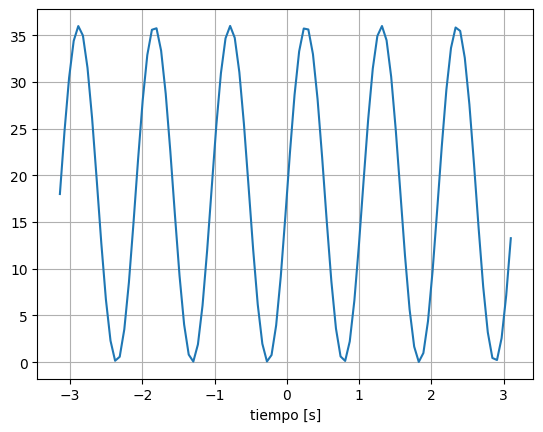

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ti = -np.pi #tiempo inicial
tf = np.pi #tiempo final
wo = 2*np.pi/(tf-ti) #frecuencia angular
Fo = wo/2*np.pi #frecuencia fundamental
print('wo=',wo)
print('Fo=',Fo)
Fs = 10*Fo #frecuencia muestreo -> debe respetar Nyquist Fs >= 2 Fo
tv = np.arange(ti,tf,1/Fs) #vector de tiempo


x = abs(6*np.sin((3*tv)+(np.pi/4)))**2 #señal de entrada
#x = (18+18*np.sin(6*tv)) #señal de entrada
plt.plot(tv,x) #gráfica de la señal
plt.xlabel('tiempo [s]')
plt.grid()
plt.ylabel('')
plt.show()

In [ ]:

#se crean las bases de la serie exponencial compleja de Fourier
T = tf - ti #intervalo de interés
N = 20 #número armonicos a simular
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((len(tv),2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

In [ ]:
# Importación de bibliotecas necesarias
from ipywidgets import interact, IntSlider
import matplotlib.pyplot as plt

# Definición de la función que grafica las bases de Fourier
def pltbase(n=1):
    # Grafica la parte real de la base
    plt.plot(tv, np.real(phin[:, int(n + N)]), label="Re{(t)}")

    # Etiquetas de los ejes y título
    plt.xlabel("t[s]", fontsize=14)
    plt.ylabel("(t)", fontsize=14)

    # Grafica la parte imaginaria de la base
    plt.plot(tv, np.imag(phin[:, int(n + N)]), label="Im{(t)}")

    # Agrega una cuadrícula al gráfico
    plt.grid()

    # Agrega una leyenda para indicar las partes real e imaginaria
    plt.legend()

    # Muestra el gráfico
    plt.show()
    return

# Creación de la interfaz interactiva utilizando interact
interact(pltbase, n=(-N, N, 1))


interactive(children=(IntSlider(value=1, description='n', max=20, min=-20), Output()), _dom_classes=('widget-i…

<function __main__.pltbase(n=1)>

In [ ]:
# Inicialización de un vector de coeficientes complejos
cn = np.zeros(2*N+1, dtype=np.complex_)

# Creación de un vector de armónicos que abarca desde -N hasta N
nv = np.linspace(-N, N, 2*N+1)

# Asignación de coeficientes específicos
cn[N] = 18       # Componente DC (C_0)
cn[N-6] = 1j*9   # Componente armónico -6
cn[N+6] = 1j*-9     # Componente armónico +6


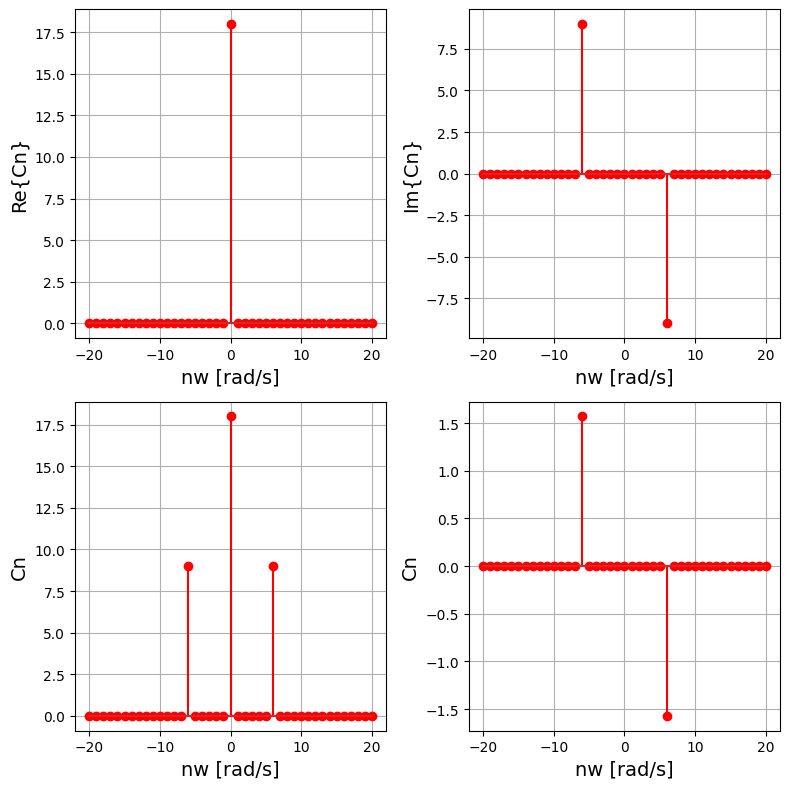

In [ ]:
# Creación de una figura para los gráficos
fig = plt.figure(figsize=(8, 8))

# Gráfico de la parte real de los coeficientes Cn
plt.subplot(2, 2, 1)
plt.stem(nv, np.real(cn), 'r')
plt.xlabel(r'nw [rad/s]', fontsize=14)
plt.ylabel(r'Re{Cn}', fontsize=14)
plt.axis('tight')
plt.grid()

# Gráfico de la parte imaginaria de los coeficientes Cn
plt.subplot(2, 2, 2)
plt.stem(nv, np.imag(cn), 'r')
plt.xlabel(r'nw [rad/s]', fontsize=14)
plt.ylabel(r'Im{Cn}', fontsize=14)
plt.axis('tight')
plt.grid()

# Gráfico de la magnitud del espectro (abs(Cn))
plt.subplot(2, 2, 3)
plt.stem(nv, abs(cn), 'r')
plt.xlabel(r'nw [rad/s]', fontsize=14)
plt.ylabel(r'Cn', fontsize=14)
plt.axis('tight')
plt.grid()

# Gráfico de la fase del espectro (angle(Cn))
plt.subplot(2, 2, 4)
plt.stem(nv, np.angle(cn), 'r')
plt.xlabel(r'nw [rad/s]', fontsize=14)
plt.ylabel(r'Cn', fontsize=14)
plt.axis('tight')
plt.grid()

# Ajusta el diseño de los gráficos para una mejor presentación
fig.tight_layout()


In [ ]:

# Potencia de la señal original x(t)
Px = 486

# Definición de la función que grafica la reconstrucción de la señal
def pltest(Na=1):
    # Rango de índices de coeficientes a considerar
    ind = range(N - Na, N + Na + 1)

    # Cálculo del error de reconstrucción
    er = 1 - np.sum(abs(cn[ind])**2) / Px

    # Señal reconstruida (xe) utilizando las bases y coeficientes seleccionados
    xe = phin[:, ind].dot(cn[ind])  # La función dot calcula el producto entre matrices/vectores

    # Graficar la señal estimada (en azul) y la señal original (en rojo)
    plt.plot(tv, xe, color='b', label='x(t)')  # Señal estimada o filtrada
    plt.plot(tv, x, color='r', label='x(t)')  # Señal original

    # Título del gráfico que muestra el error de reconstrucción
    plt.title('E_r=%.2f[%%]' % (100 * er), fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()
    return

# Creación de una interfaz interactiva para ajustar el número de armónicos utilizados (Na)
interact(pltest, Na=(1, N, 1))


interactive(children=(IntSlider(value=1, description='Na', max=20, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>

In [ ]:
#Punto 2

#simulación con canción de youtube
#instalar api youtube-dl
! pip install youtube-dl
#descargar canción de interés
link="https://music.youtube.com/watch?v=49FB9hhoO6c&si=keW1H-bRKaAEnVYq"
! youtube-dl --extract-audio -o "audio.%(mp3)s" --audio-format mp3  {link}

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.2 MB/s eta 0:00:00
[youtube] 49FB9hhoO6c: Downloading webpage
[youtube] 49FB9hhoO6c: Downloading player 9e328581
[download] Destination: audio.NA
[download] 100% of 3.78MiB in 01:01
[ffmpeg] Destination: audio.mp3
Deleting original file audio.NA (pass -k to keep)


In [ ]:
#convertir a .wav con ffmpeg para extraer audio en python
!ffmpeg -i audio.mp3 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
#instalar soundfile para cargar .wav
!pip install soundfile

In [ ]:
import soundfile as sf # para instalar pip install soundfile
from IPython.display import Audio #librería para reproducir audio
#leer archivo wav
nombre_out = "output.wav"
xa, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 48000.00[Hz]
audio output.wav


In [ ]:
xpro = xa.copy() #copiar archivos para procesar
#leer 5 segundos de la canción
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal

In [ ]:

#repoducir fragmento original #señal mensaje
Audio(m,rate=fs)


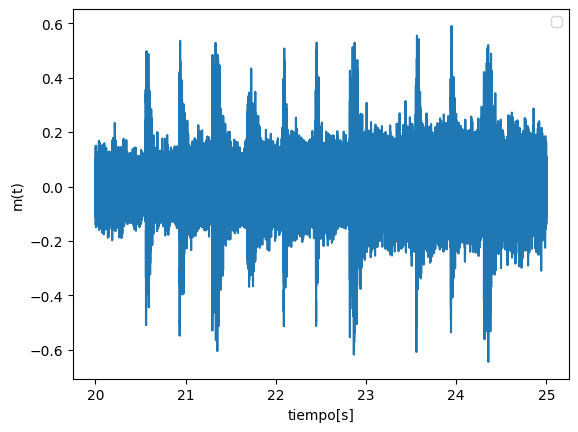

In [ ]:
#Señal mensaje en tiempo y frecuencia
tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,m) #graficar señal mensaje en el tiempo
plt.xlabel('tiempo[s]')
plt.ylabel('m(t)')
plt.legend()
plt.show()

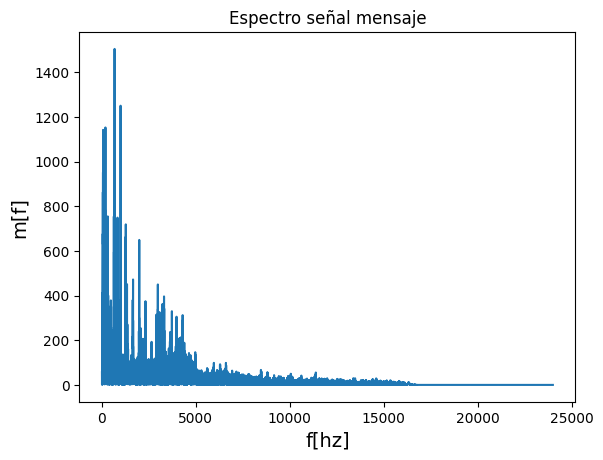

Text(0, 0.5, '$')

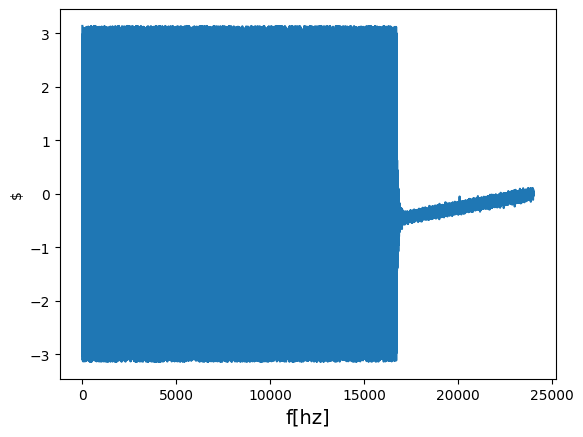

In [ ]:
#Fourier señal mensaje
Mw = np.fft.rfft(m) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(m.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw))#se grafica la magnitud
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'f[hz]',fontsize = 14)
plt.ylabel(r'm[f]',fontsize = 14)
plt.show()

plt.plot(vf, np.angle(Mw))#fase del espectro
plt.xlabel(r'f[hz]',fontsize = 14)
plt.ylabel(r'$')

In [ ]:
Fc = 15000 #frecuencia portadora
Im = 1# Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im
Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.cos(2*np.pi*Fc*tt) #portadora

In [ ]:
#repoducir portadora
Audio(c,rate=fs)

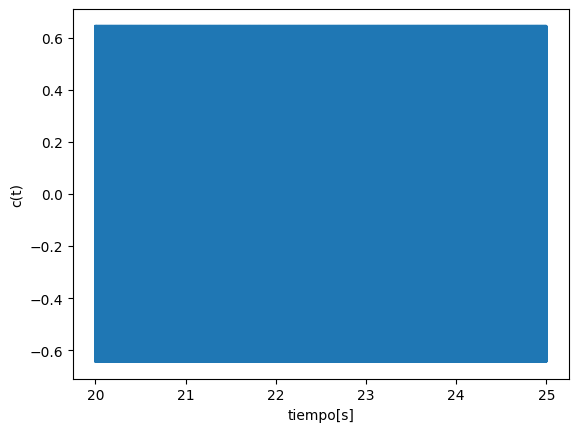

In [ ]:

#Señal portadora en tiempo y frecuencia
plt.plot(tt,c) #graficar señal mensaje en el tiempo
plt.xlabel('tiempo[s]')
plt.ylabel('c(t)')
plt.show()


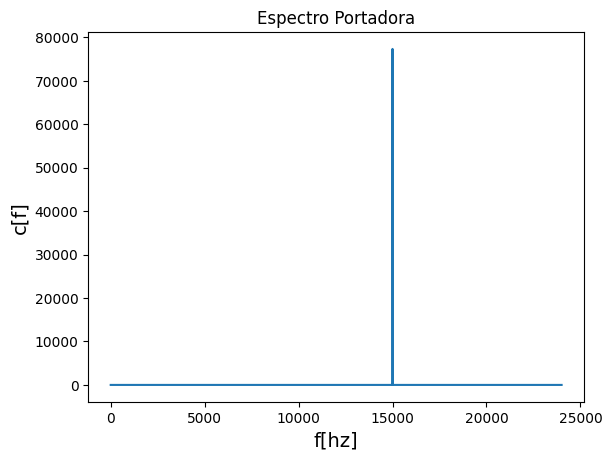

Text(0, 0.5, '$')

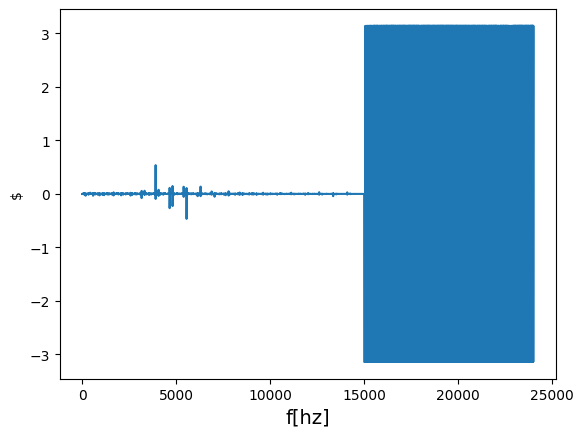

In [ ]:
#Fourier señal portadora
Cw = np.fft.rfft(c) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Cw))#se grafica la magnitud
plt.title(r'Espectro Portadora')
plt.xlabel(r'f[hz]',fontsize = 14)
plt.ylabel(r'c[f]',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Cw))#fase del espectro
plt.xlabel(r'f[hz]',fontsize = 14)
plt.ylabel(r'$')

In [ ]:
#señal modulada
y = (1+m/Ac)*c #señal modulada en AM


In [ ]:

#repoducir modulada
Audio(y,rate=fs)


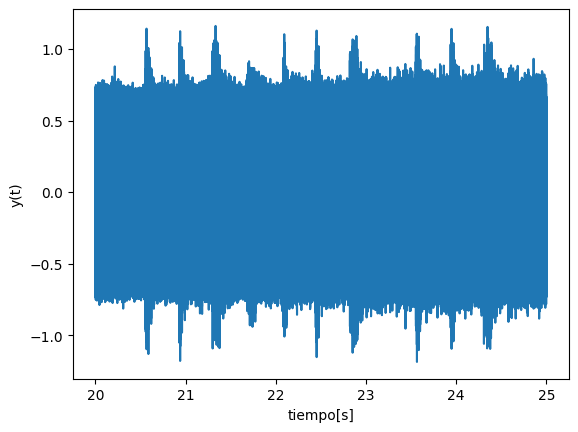

In [ ]:
plt.plot(tt,y) #graficar señal mensaje en el tiempo
plt.xlabel('tiempo[s]')
plt.ylabel('y(t)')
plt.show()

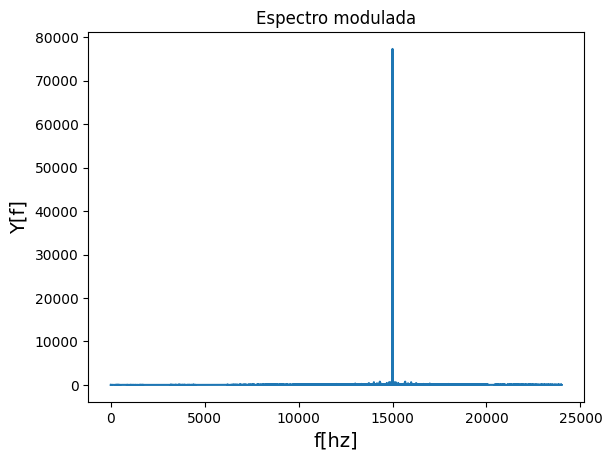

Text(0, 0.5, '$')

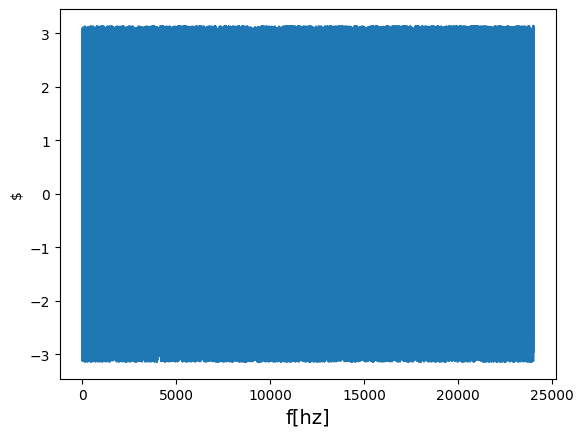

In [ ]:
#Fourier señal modulada
Yw = np.fft.rfft(y) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Yw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'f[hz]',fontsize = 14)
plt.ylabel(r'Y[f]',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Yw))#fase del espectro
plt.xlabel(r'f[hz]',fontsize = 14)
plt.ylabel(r'$')